In [ ]:
# installing basic python3 library
!pip3 install numpy
!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
!pip install unidecode
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.tree import DecisionTreeClassifier

df = pd.read_json('https://raw.githubusercontent.com/hieuvuong2310/What-cooking/main/train.json')

# Data Overview

In [ ]:
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


We have 39,774 instances in the dataset. No need to impute since each instance is complete, i.e., no null values.

Let's store the number of instances as m and the number of features as n.

In [ ]:
m, n = df.shape

# Analysis of 'id'

In [ ]:
df.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


It is rather odd that we have 39774 ids, but the range of ids is 0-49717. It isn't obvious why certain ids are chosen for a given recipe.

Let's make sure that the ids are all unique.

In [ ]:
len(df['id'].unique())

39774

Sure enough, each recipe is given a unique id. We can exclude this column while training our models, as it seems that it is assigned arbitrarily and will not help us classify the recipes.

# Analysis of 'cuisine'

In [ ]:
df['cuisine'].describe()

count       39774
unique         20
top       italian
freq         7838
Name: cuisine, dtype: object

We are categorizing recipes into 20 different cuisine categories.

In [ ]:
cuisine_list = df["cuisine"].unique()
cuisine_list

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [ ]:
df["cuisine"].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

<Axes: xlabel='cuisines', ylabel='frequency'>

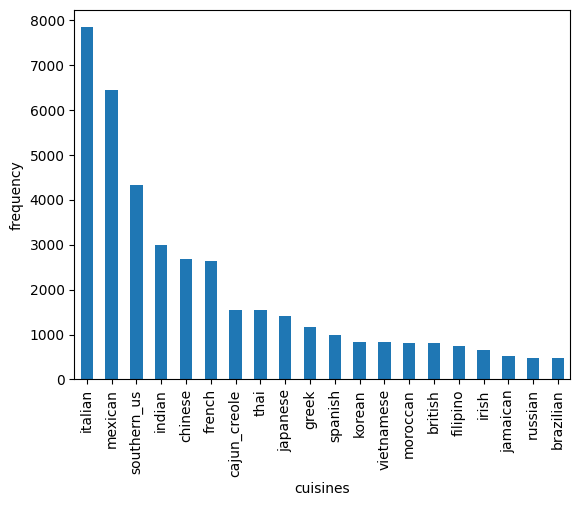

In [ ]:
df['cuisine'].value_counts().plot(kind='bar', xlabel='cuisines', ylabel='frequency')

# Analysis of 'ingredients'

In [ ]:
df['ingredients'].describe()

count                 39774
unique                39674
top       [unsalted butter]
freq                      3
Name: ingredients, dtype: object

There are 39,774 recipes and 39,674 unique ingredient lists. In other words, there are recipes with the exact same ingredient lists.

In [ ]:
shortest = len(min(df.ingredients, key=len))
longest = len(max(df.ingredients, key=len))
shortest
print('Ingredient List Length:','min =', shortest, ', max =', longest)

Ingredient List Length: min = 1 , max = 65


# Ingredient Processing
Let's try to take the ingredient lists apart.

In [ ]:
# Finding unique ingredients
def get_unique_ingredients():

  # Store ingredients in a set to avoid duplicates
  unique_ingredients = set()

  # Loop over rows, updating the ingredient set
  for i in range(m):
    ingredient_list = df["ingredients"][i]
    unique_ingredients.update(ingredient_list)

  return unique_ingredients

len(get_unique_ingredients())

6714

There are 6714 unique ingredients.

In [ ]:
# To build a list of all ingredients, repeats allowed

def get_all_ingredients():
  all_ingredients = list()

  # Loop over rows, extending the ingredient list
  for i in range(m):
    ingredient_list = df["ingredients"][i]
    all_ingredients.extend(ingredient_list)

  return all_ingredients

In [ ]:
""" Not feasible/time efficient
from spellchecker import SpellChecker

def find_misspelled_words(text_list):
    spell = SpellChecker()

    misspelled_words = []

    # Find misspelled words
    for word in text_list:
        if not spell.correction(word) == word:
            misspelled_words.append(word)

    return misspelled_words

find_misspelled_words(get_unique_ingredients())
"""

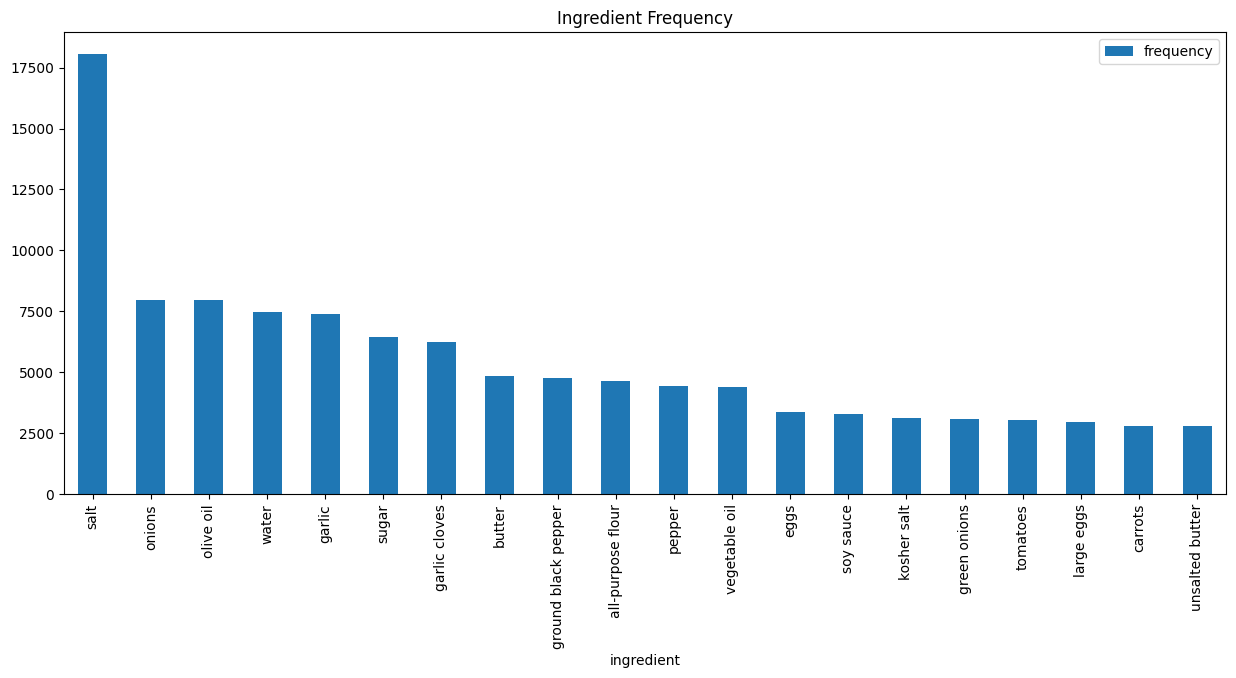

In [ ]:
from collections import Counter
from matplotlib import pyplot as plt

def plot_common_ingredients(start, end):

  # Create an ingredient counter
  ingredient_counter = Counter(get_all_ingredients())

  # Find the 'n' most common ingredients
  common_ingredients = ingredient_counter.most_common()[:start:end]
  # Plot the frequency of these ingredients
  df2 = pd.DataFrame(common_ingredients, columns=['ingredient', 'frequency'])
  fig, ax = plt.subplots(figsize=(15,6))
  df2.plot(title='Ingredient Frequency', kind='bar', x='ingredient', ax=ax)
  plt.show()

plot_common_ingredients(20,1)

As expected, ingredients like salt, onions and water are among the most frequent ingredients.

In [ ]:
ingredient_counter = Counter(get_all_ingredients())

ingredient_counter.most_common()[:-21:-1]  # 20 least common ingredients

# plot_common_ingredients(-21,-1)

[('crushed cheese crackers', 1),
 ('tomato garlic pasta sauce', 1),
 ('lop chong', 1),
 ('Hidden Valley® Greek Yogurt Original Ranch® Dip Mix', 1),
 ('Lipton® Iced Tea Brew Family Size Tea Bags', 1),
 ('ciabatta loaf', 1),
 ('cholesterol free egg substitute', 1),
 ('orange glaze', 1),
 ('Challenge Butter', 1),
 ('Oscar Mayer Cotto Salami', 1),
 ('Kraft Slim Cut Mozzarella Cheese Slices', 1),
 ('curry mix', 1),
 ('Daiya', 1),
 ('tongue', 1),
 ('game', 1),
 ('rotini pasta, cook and drain', 1),
 ('chocolate flavored liqueur', 1),
 ('ketjap', 1),
 ('ranch-style seasoning', 1),
 ('whole wheat peasant bread', 1)]

The least common ingredients are more specialized and brand-specific. Notice that we have special characters, such as '®' and '-'. We will need to remove these when processing the data.

In [ ]:
# To find unique ingredients in each cuisine
def get_cuisines_ingredients():
  cuisine_ingredients = {}

  for cuisine in df["cuisine"].unique():
    for items in df[df["cuisine"] == cuisine]["ingredients"]:
      if (cuisine not in cuisine_ingredients):
        cuisine_ingredients[cuisine] = []
      else:
        cuisine_ingredients[cuisine].extend(items)
  return cuisine_ingredients

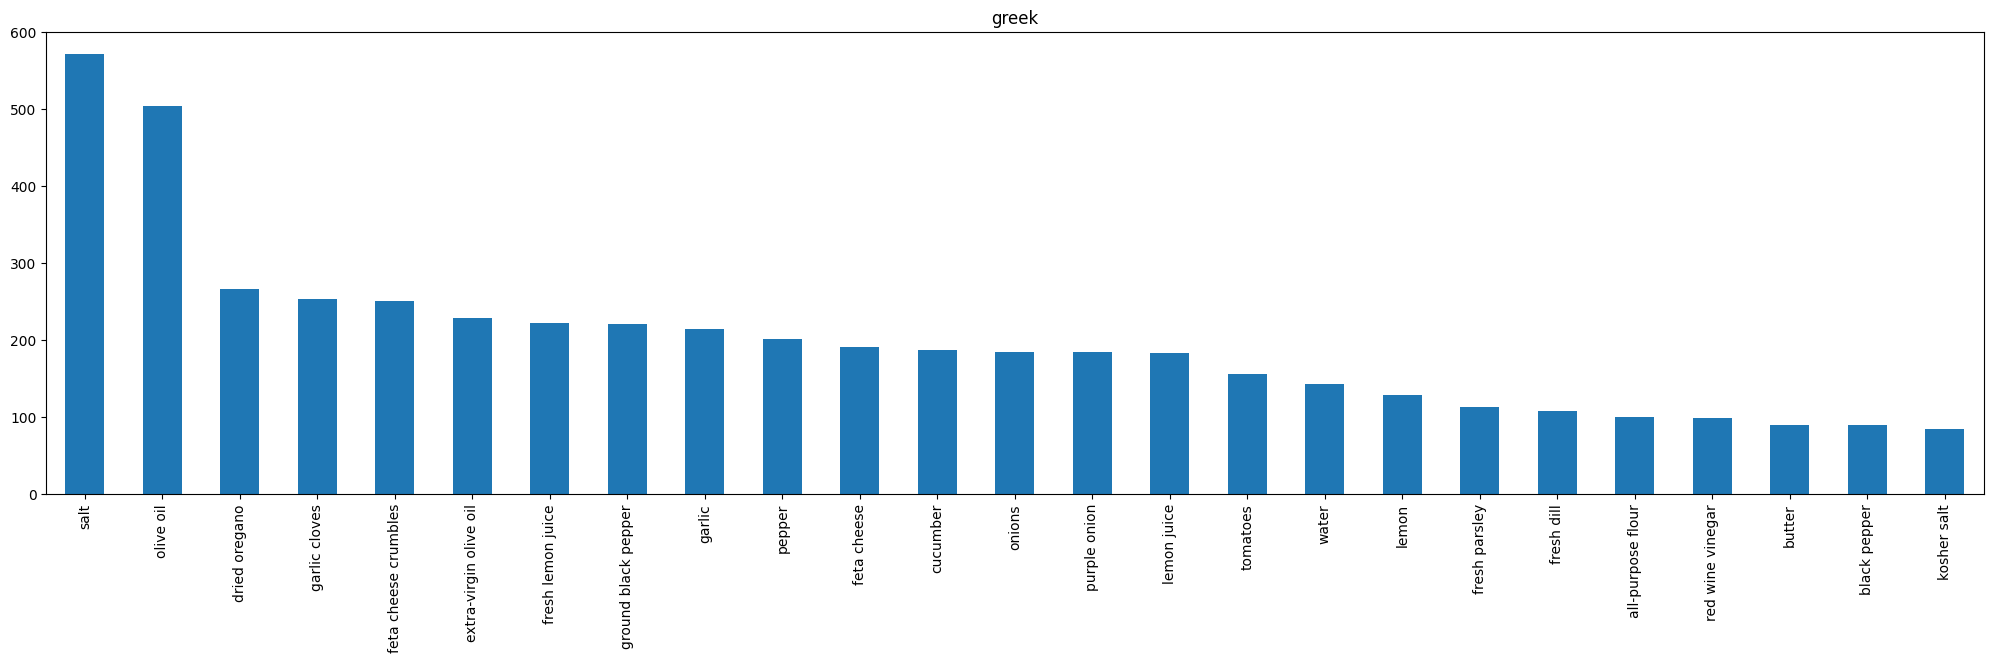

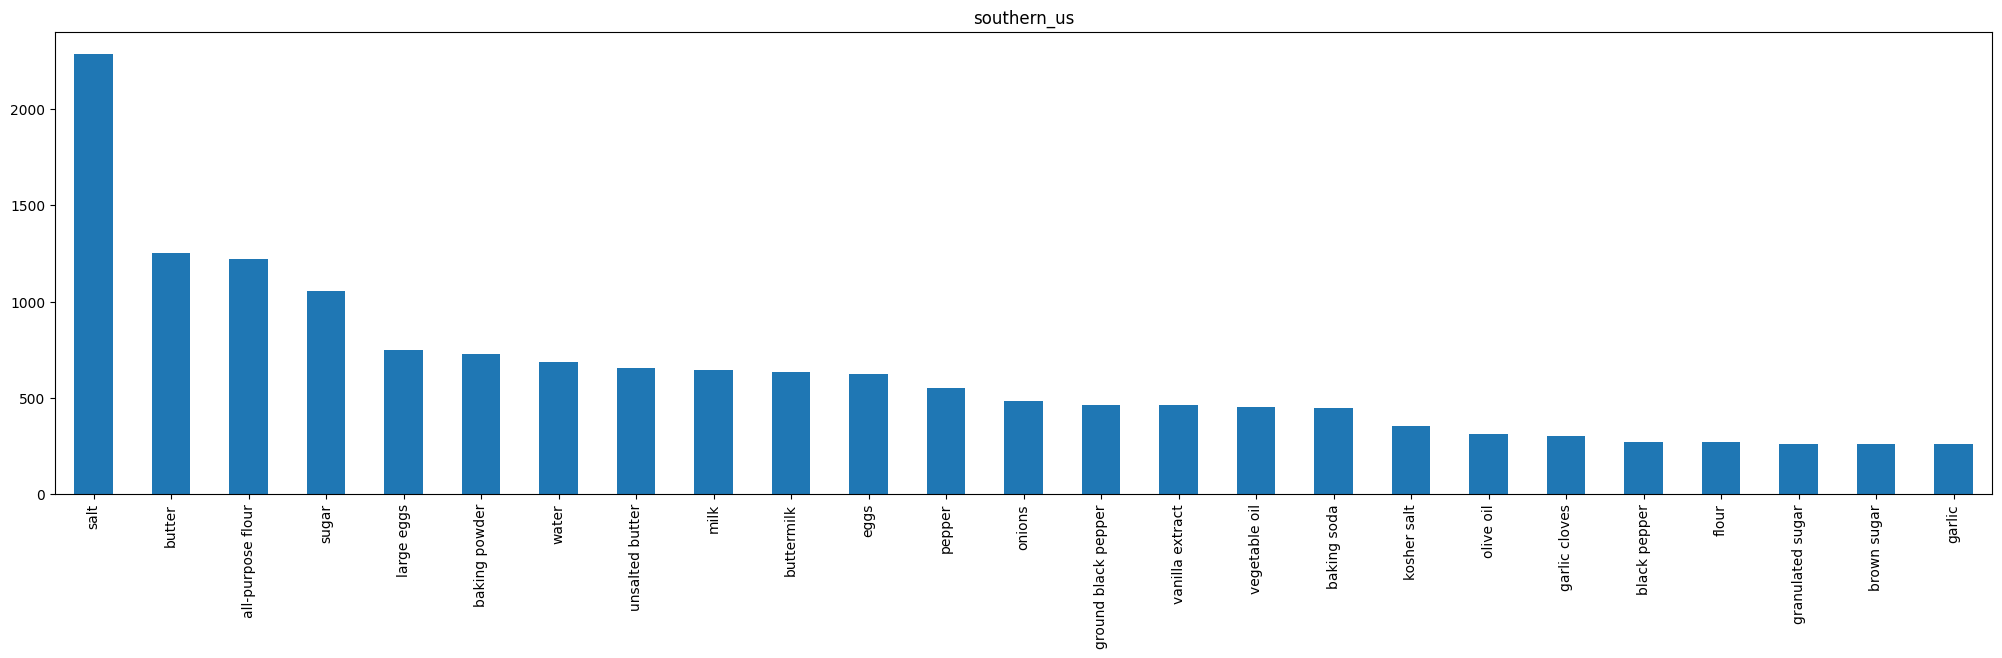

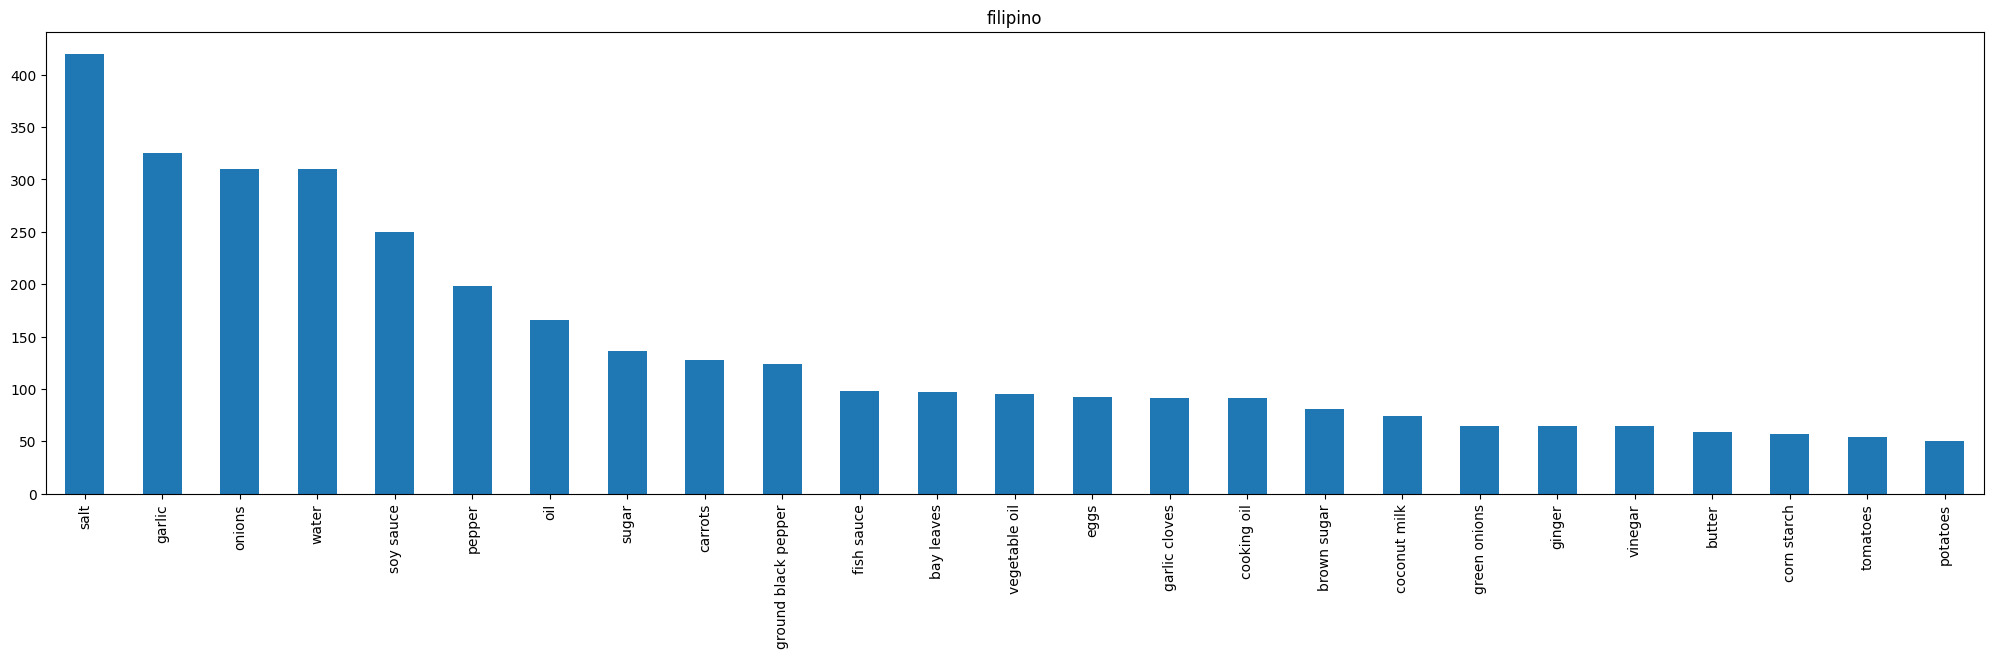

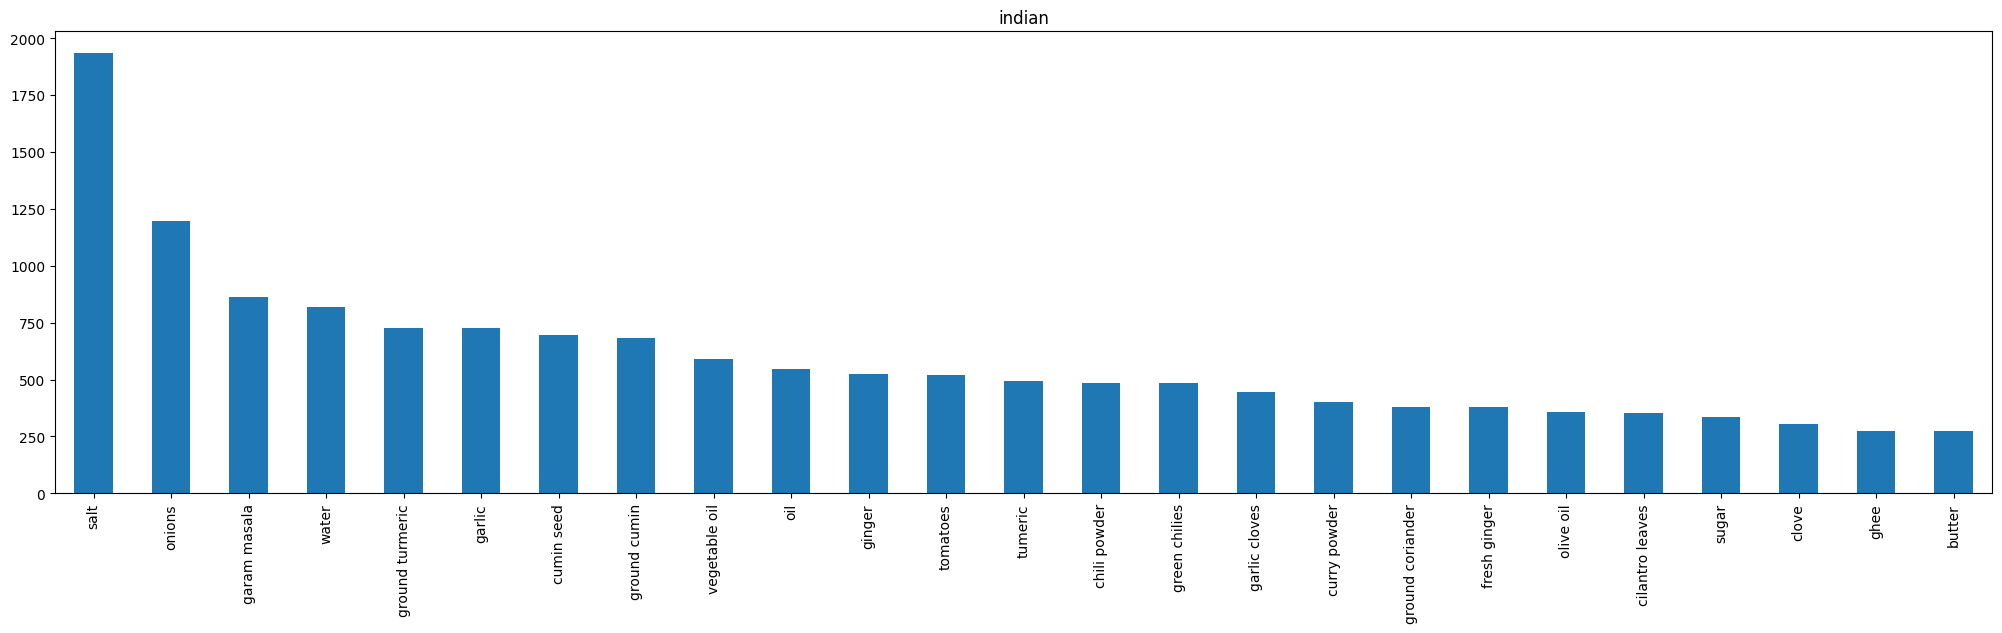

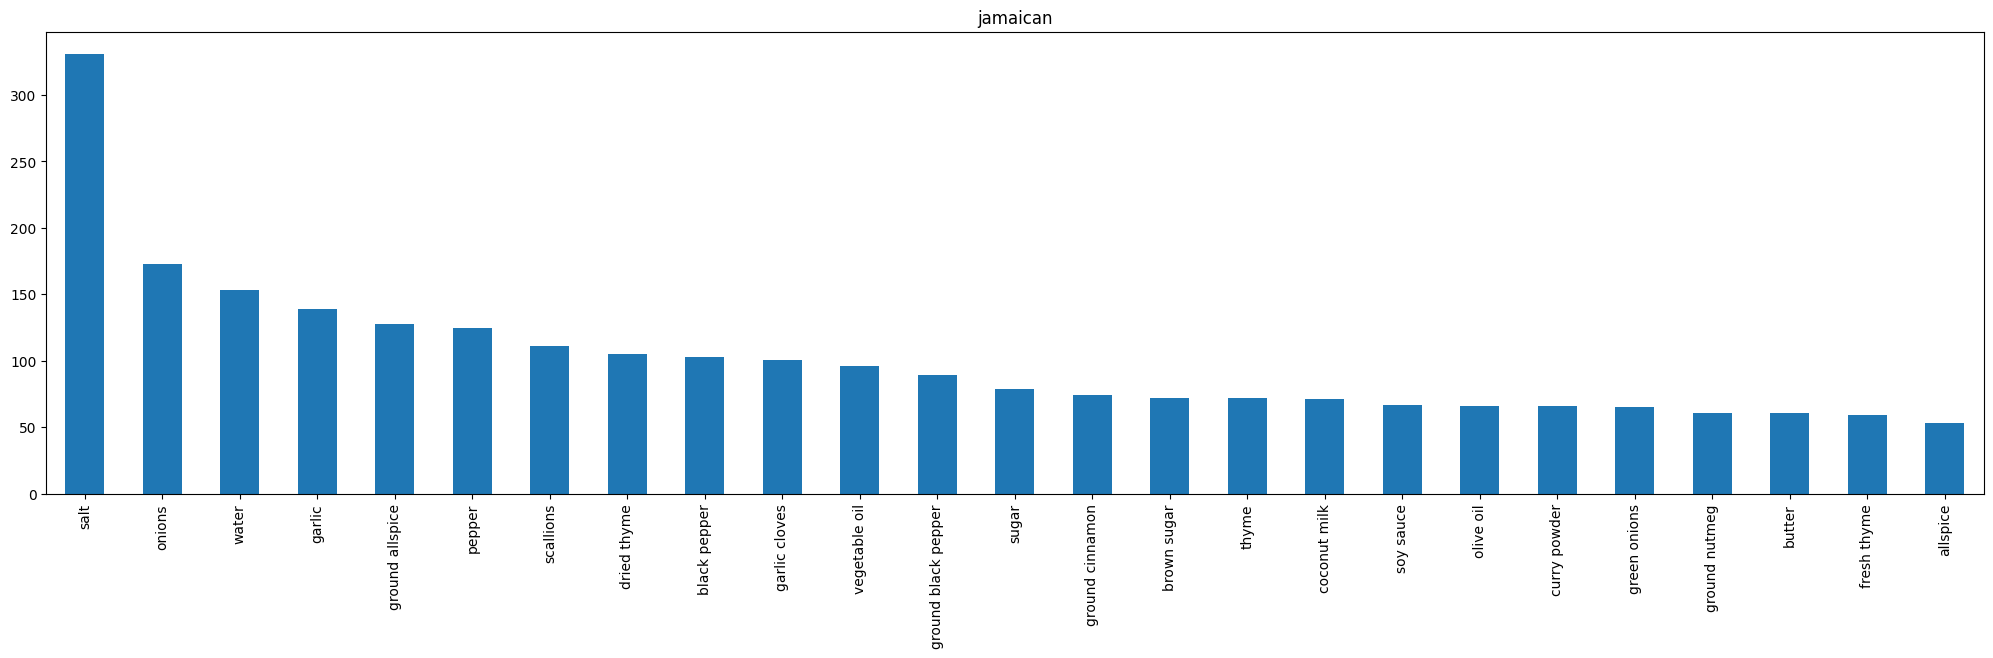

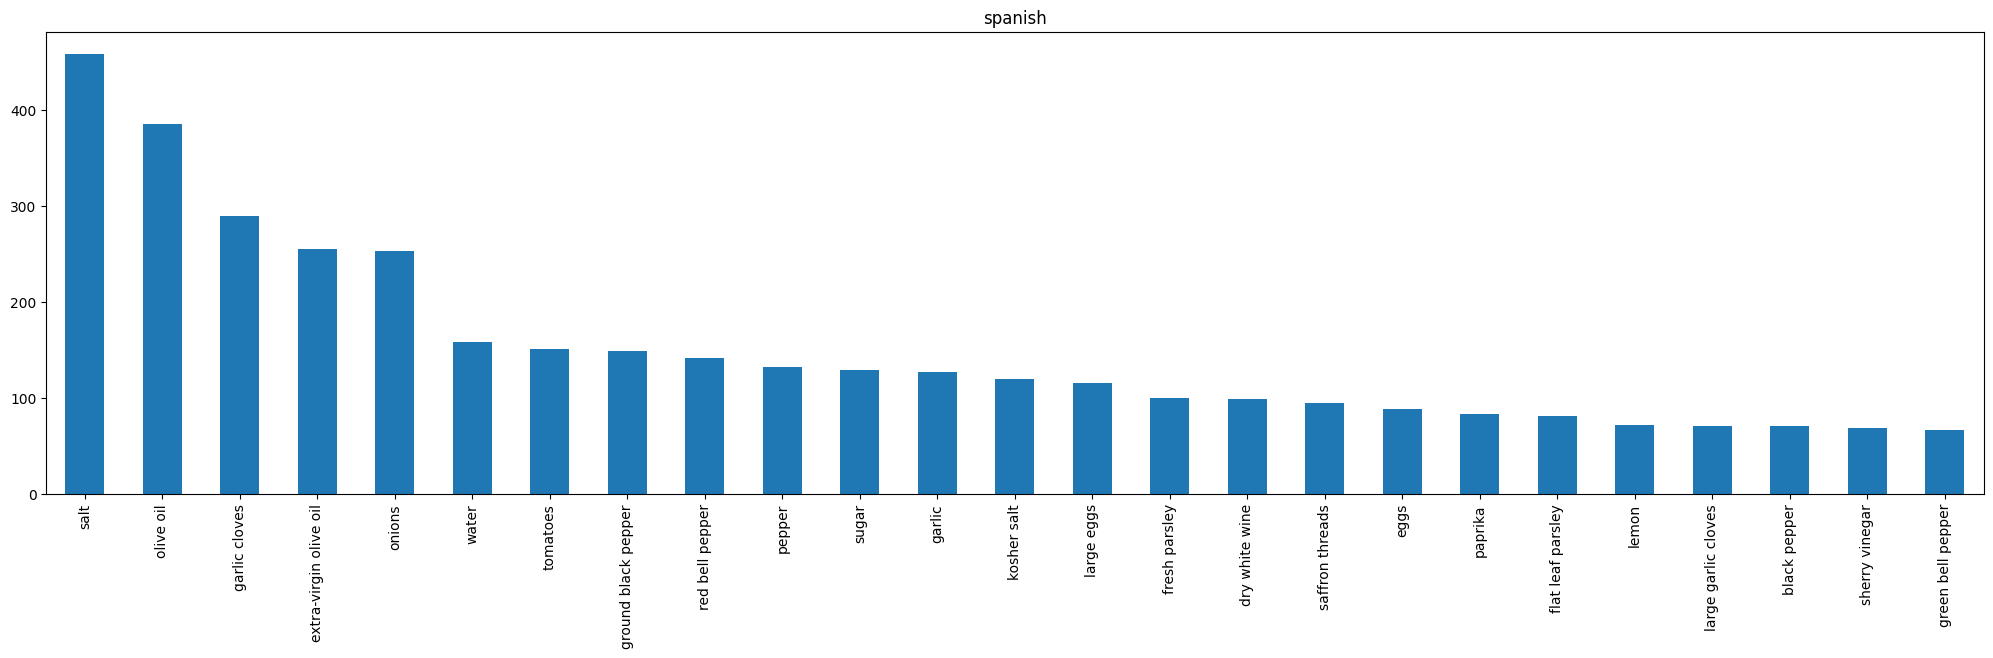

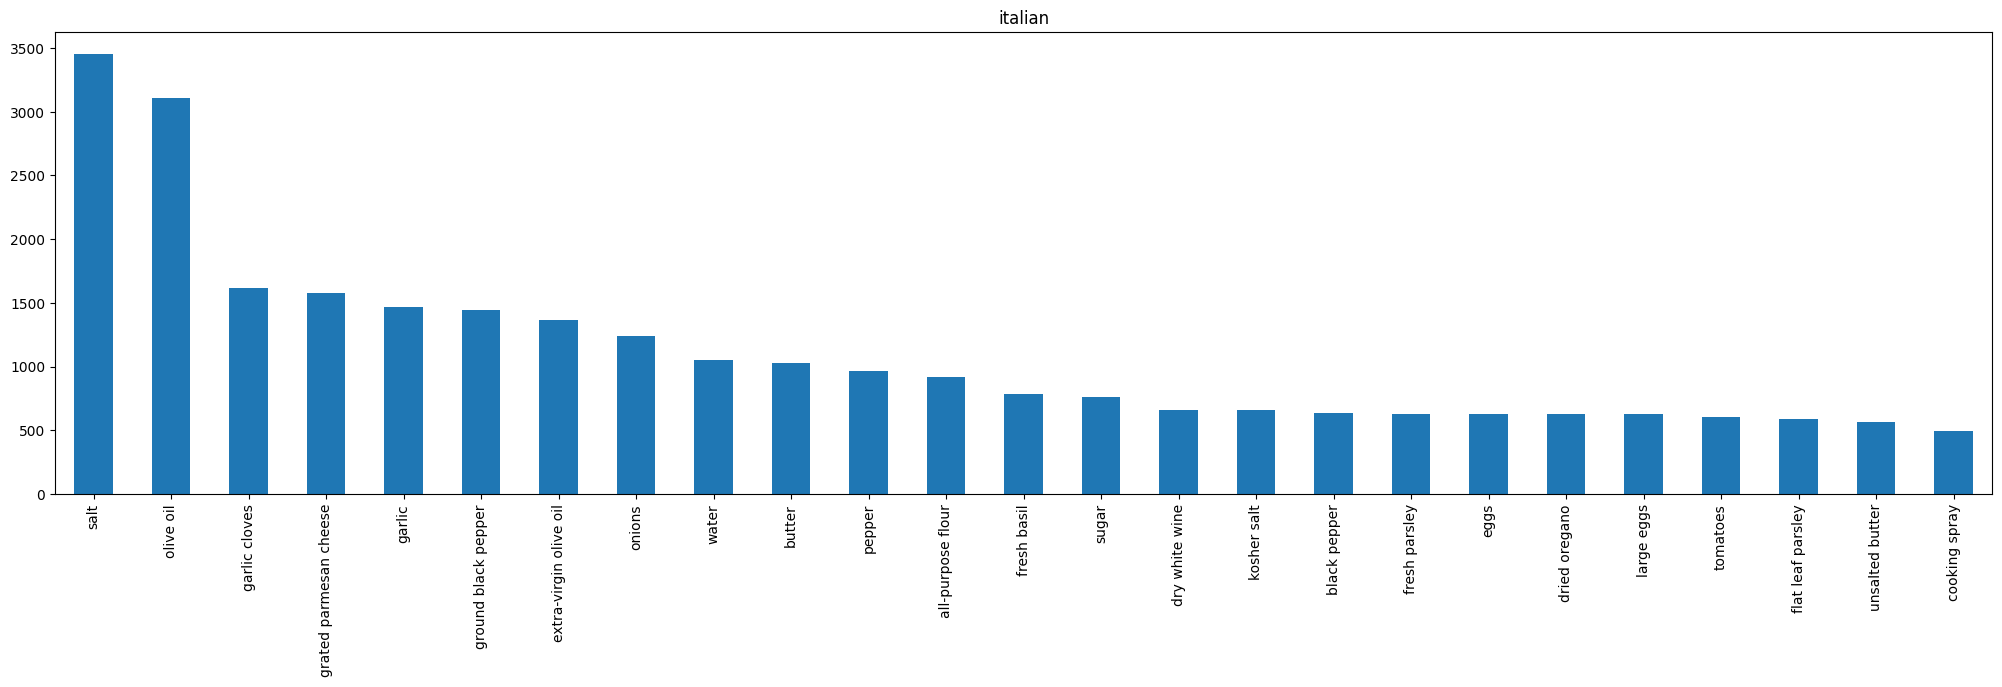

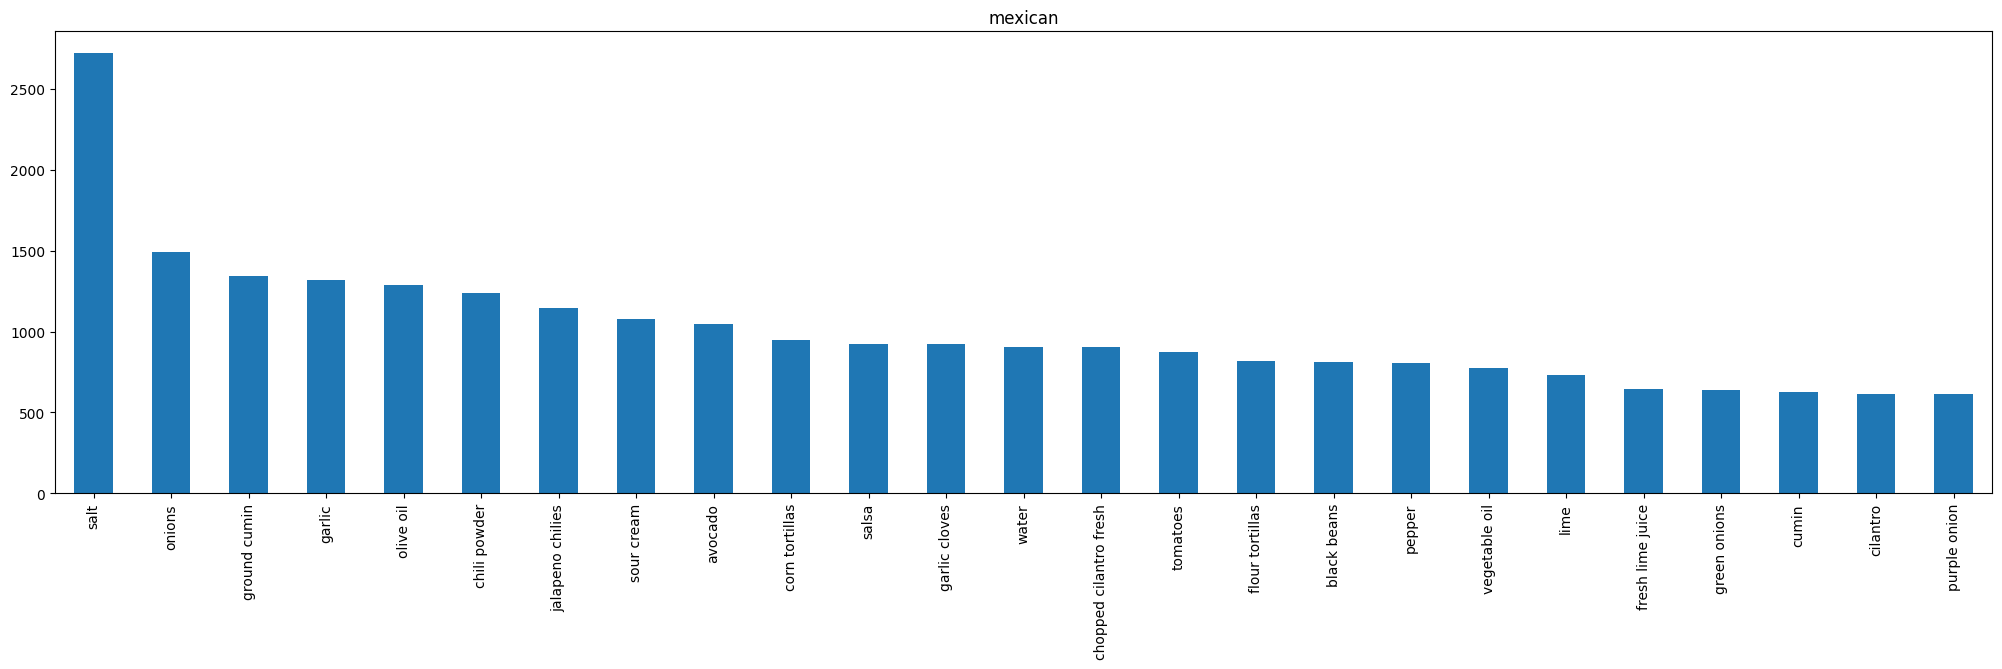

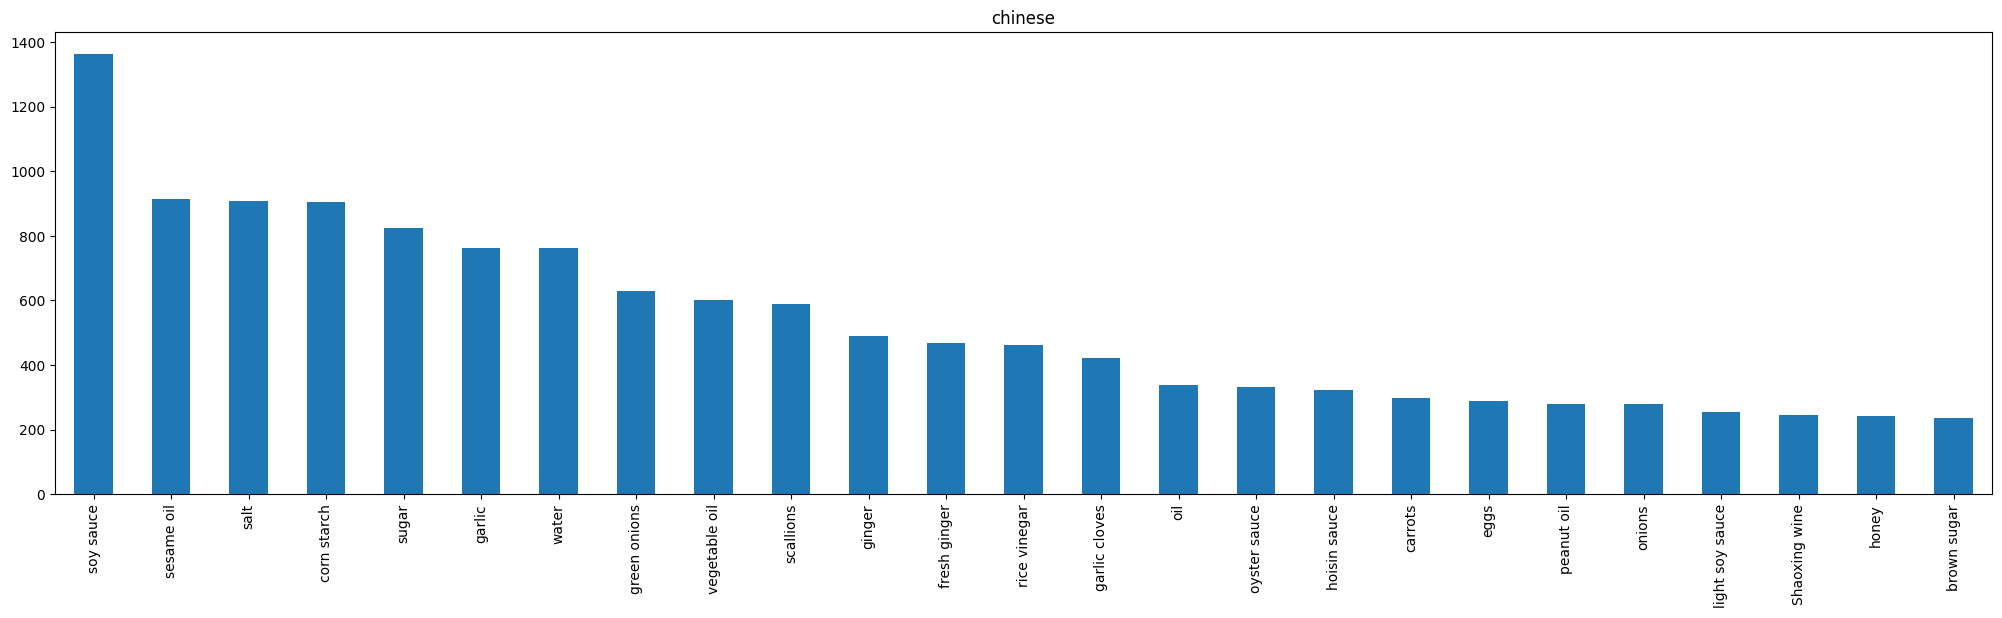

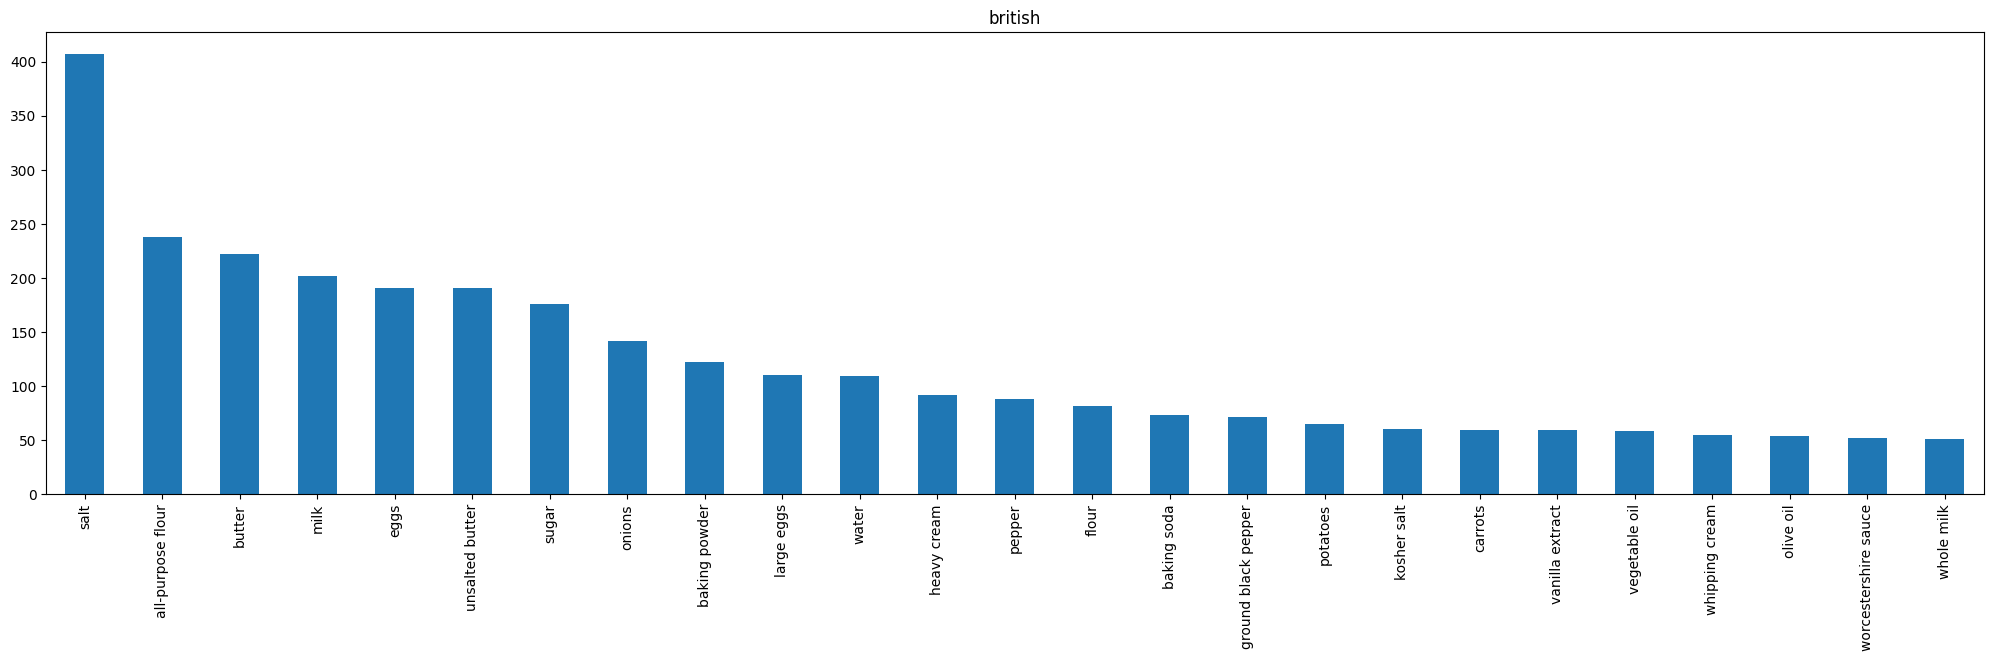

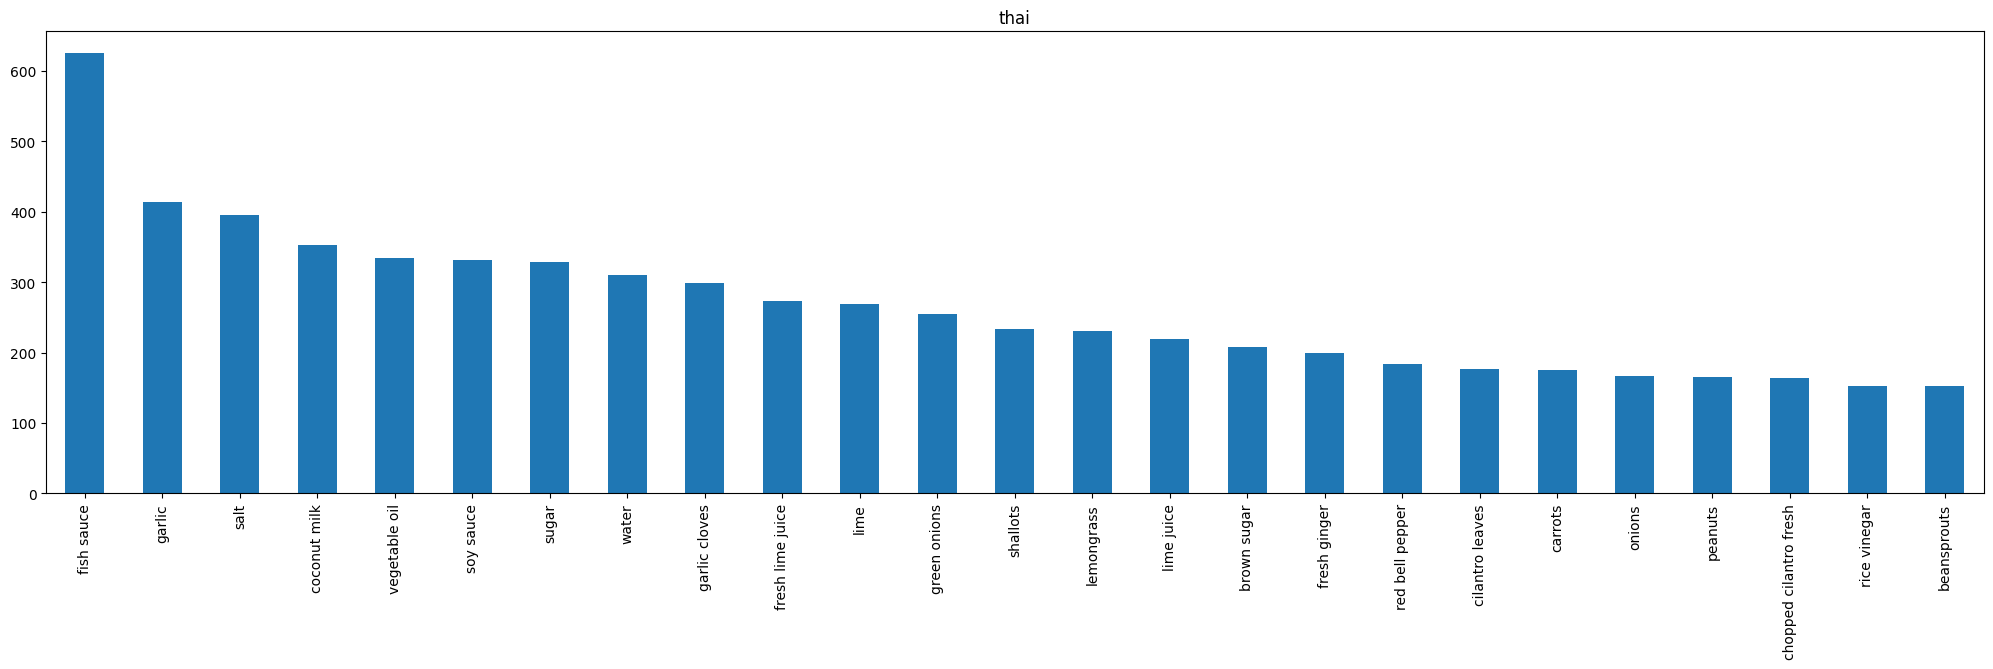

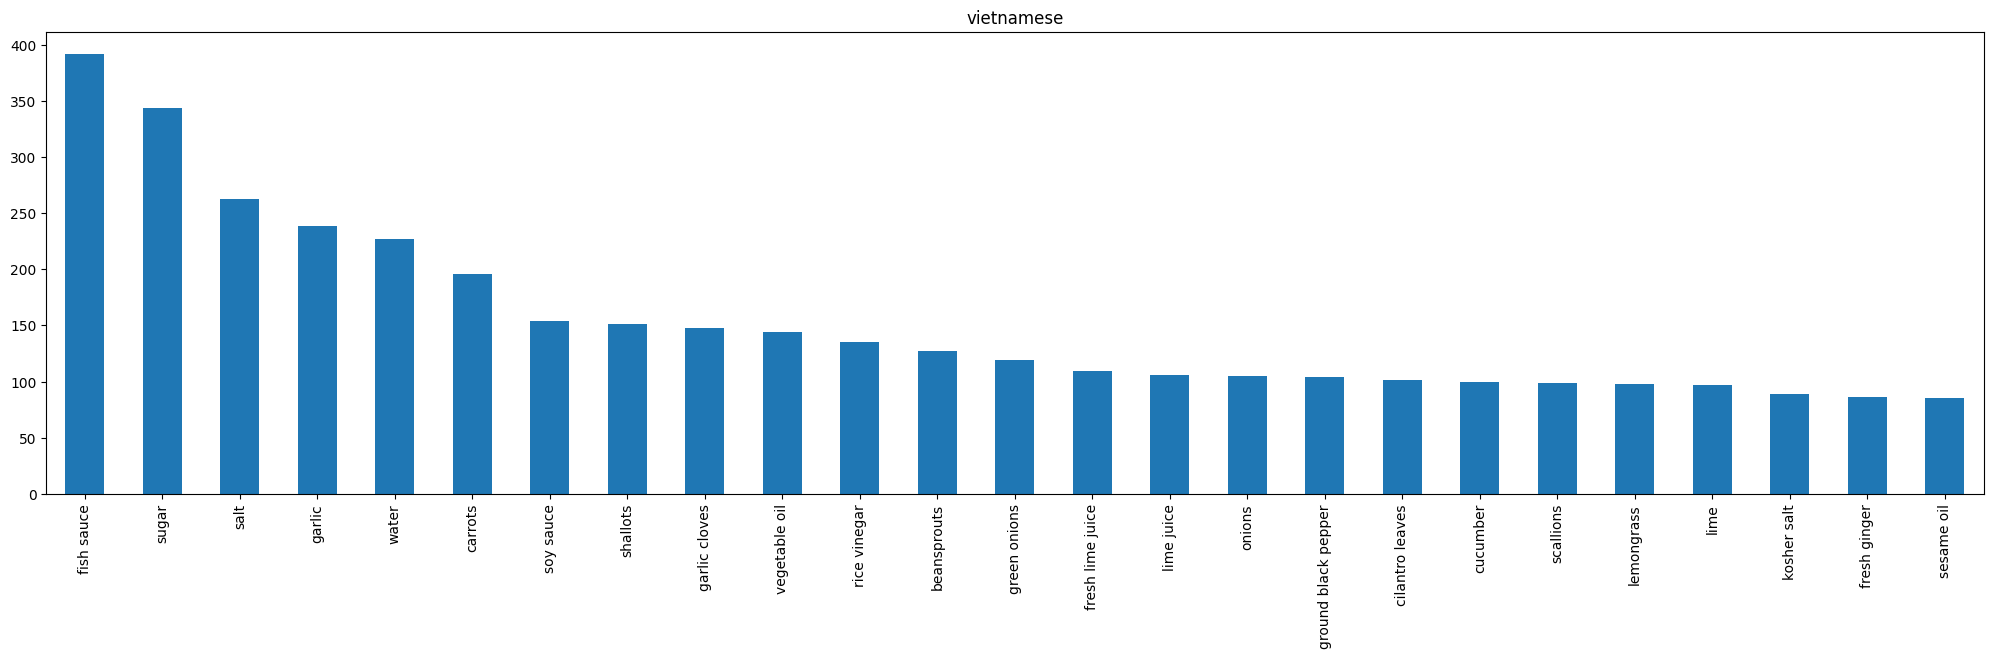

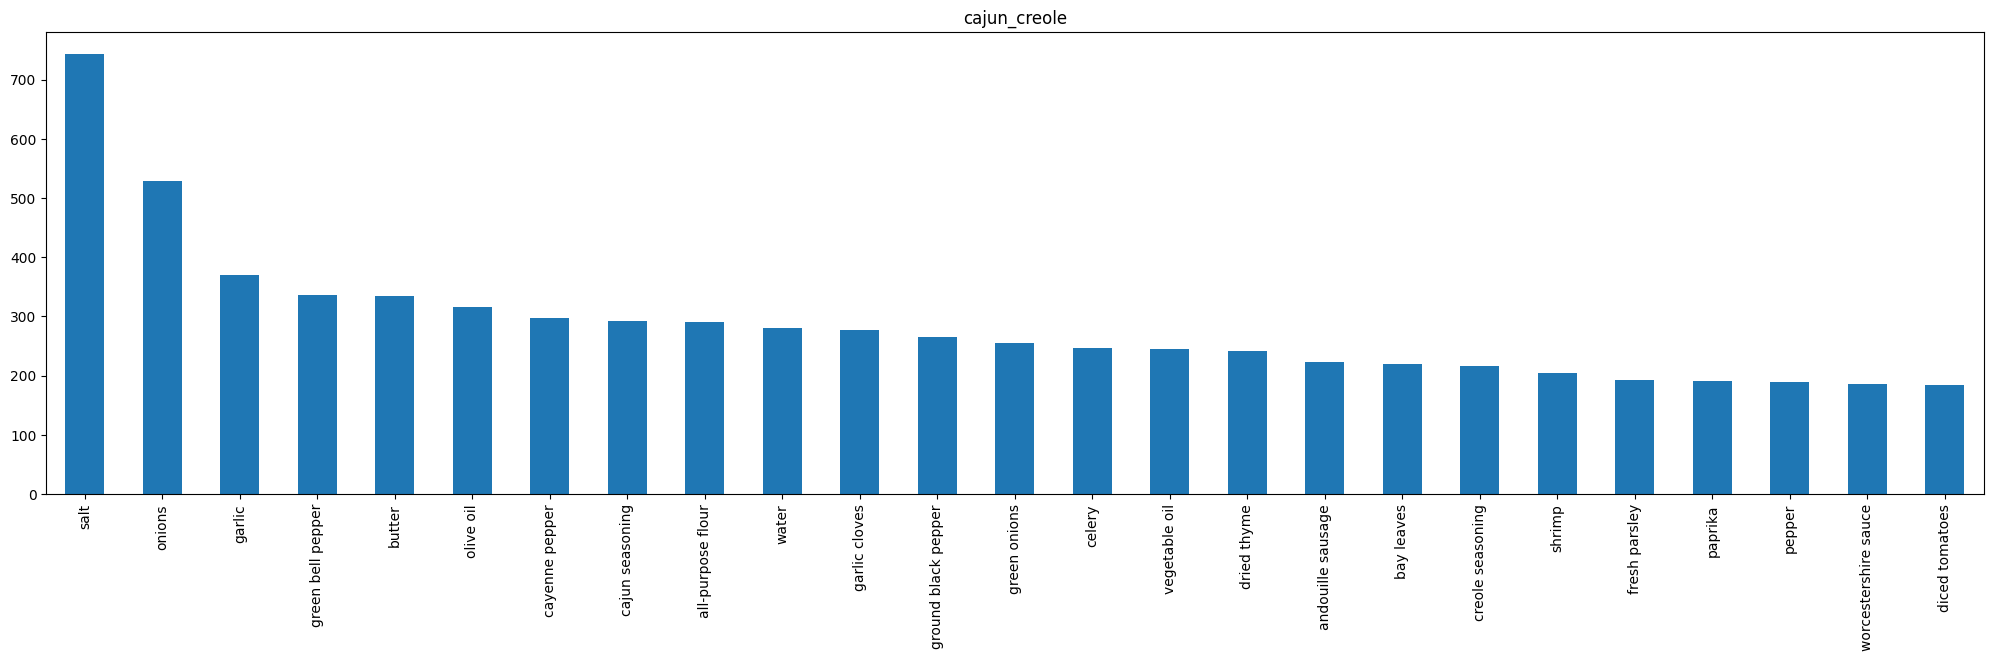

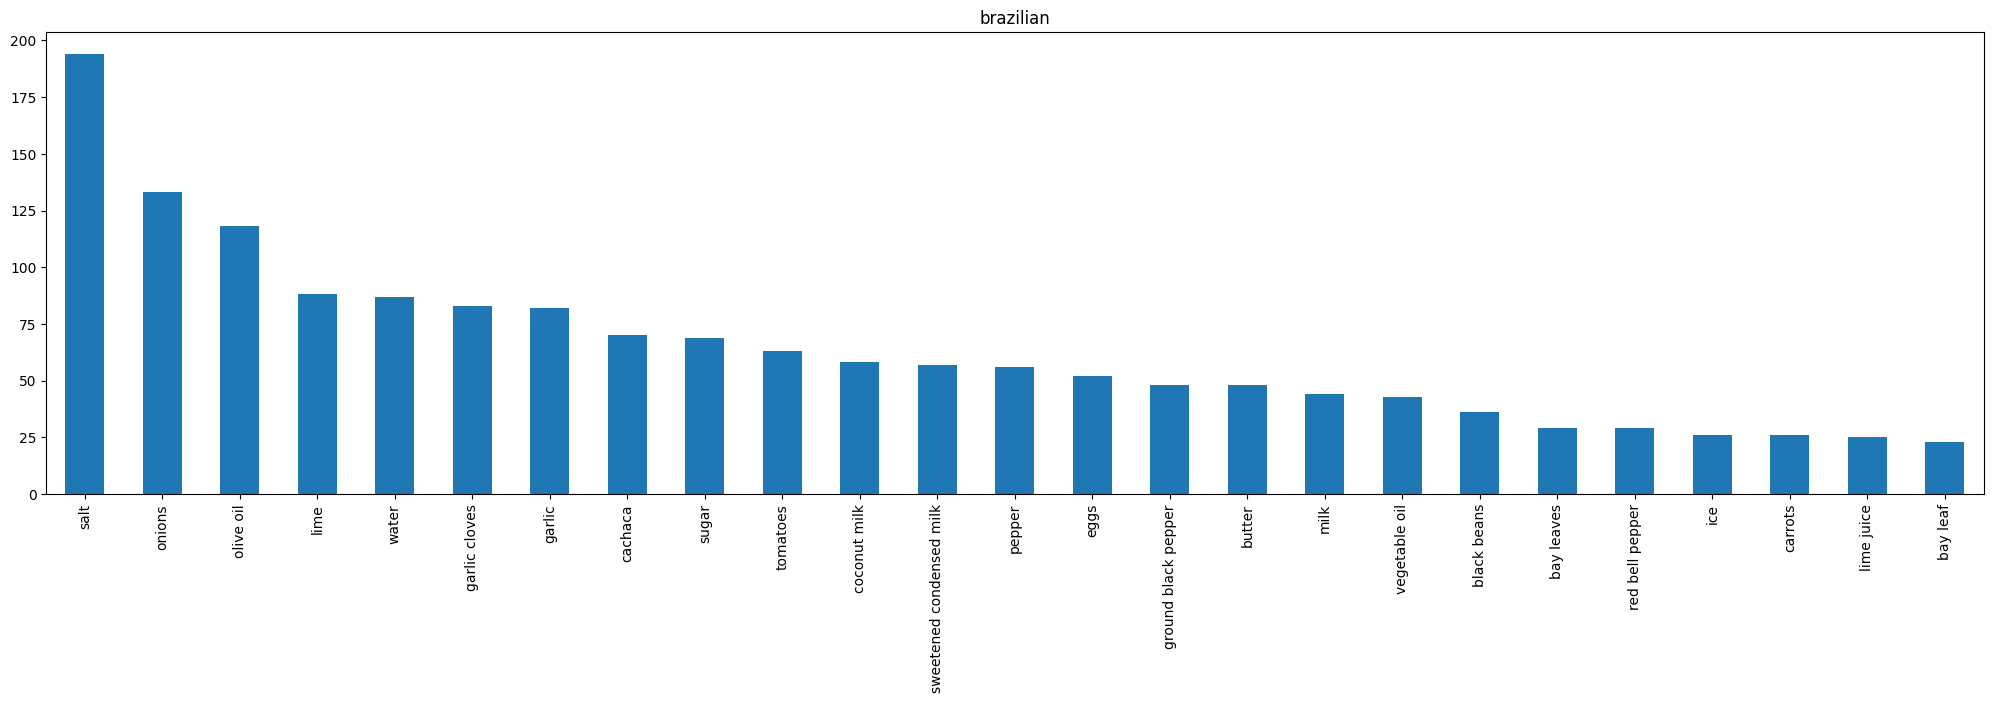

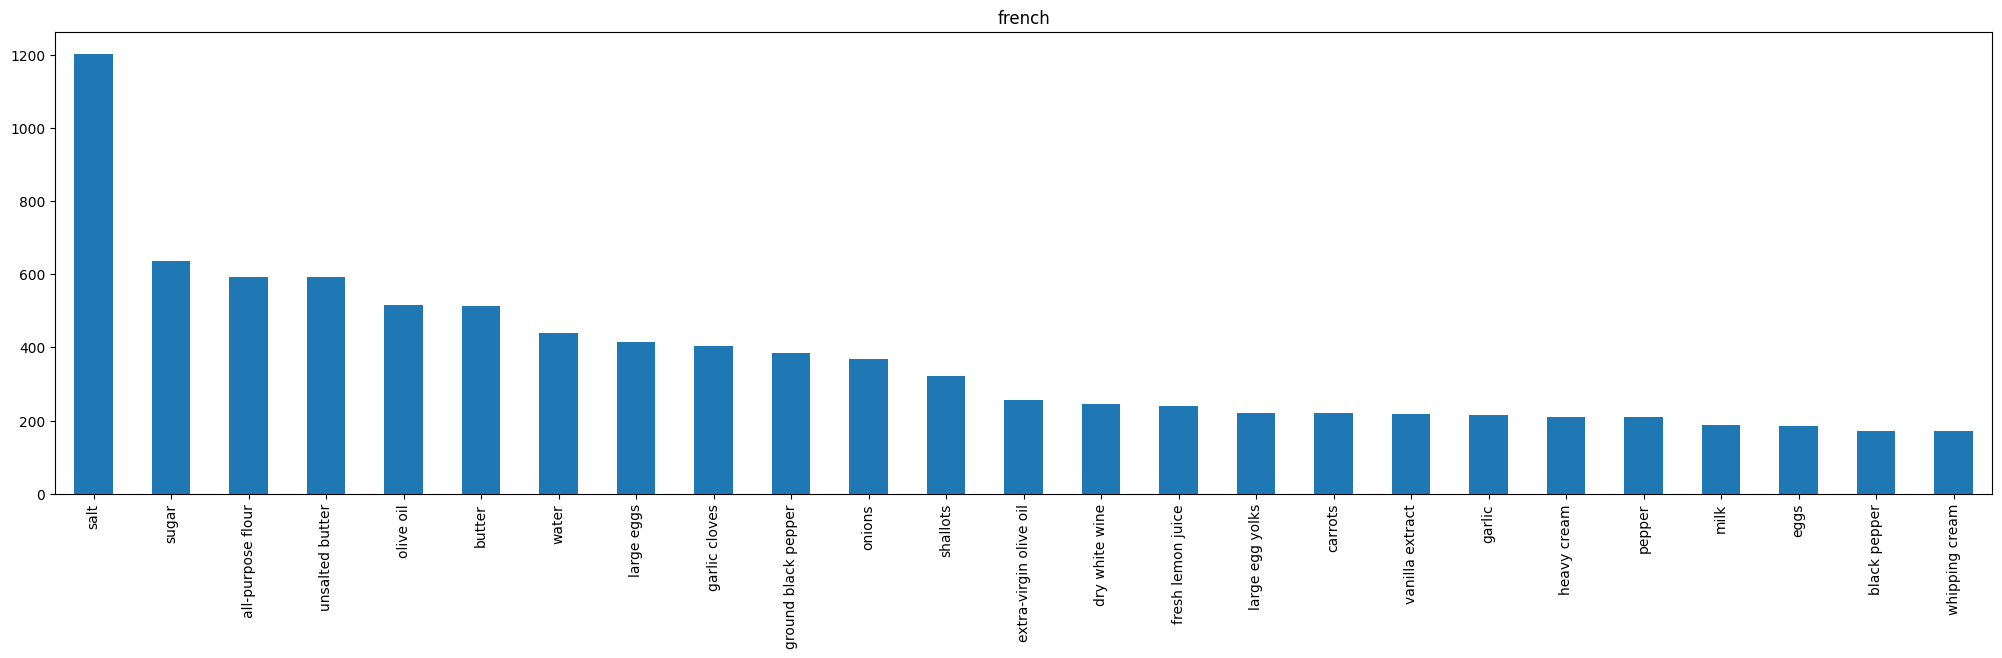

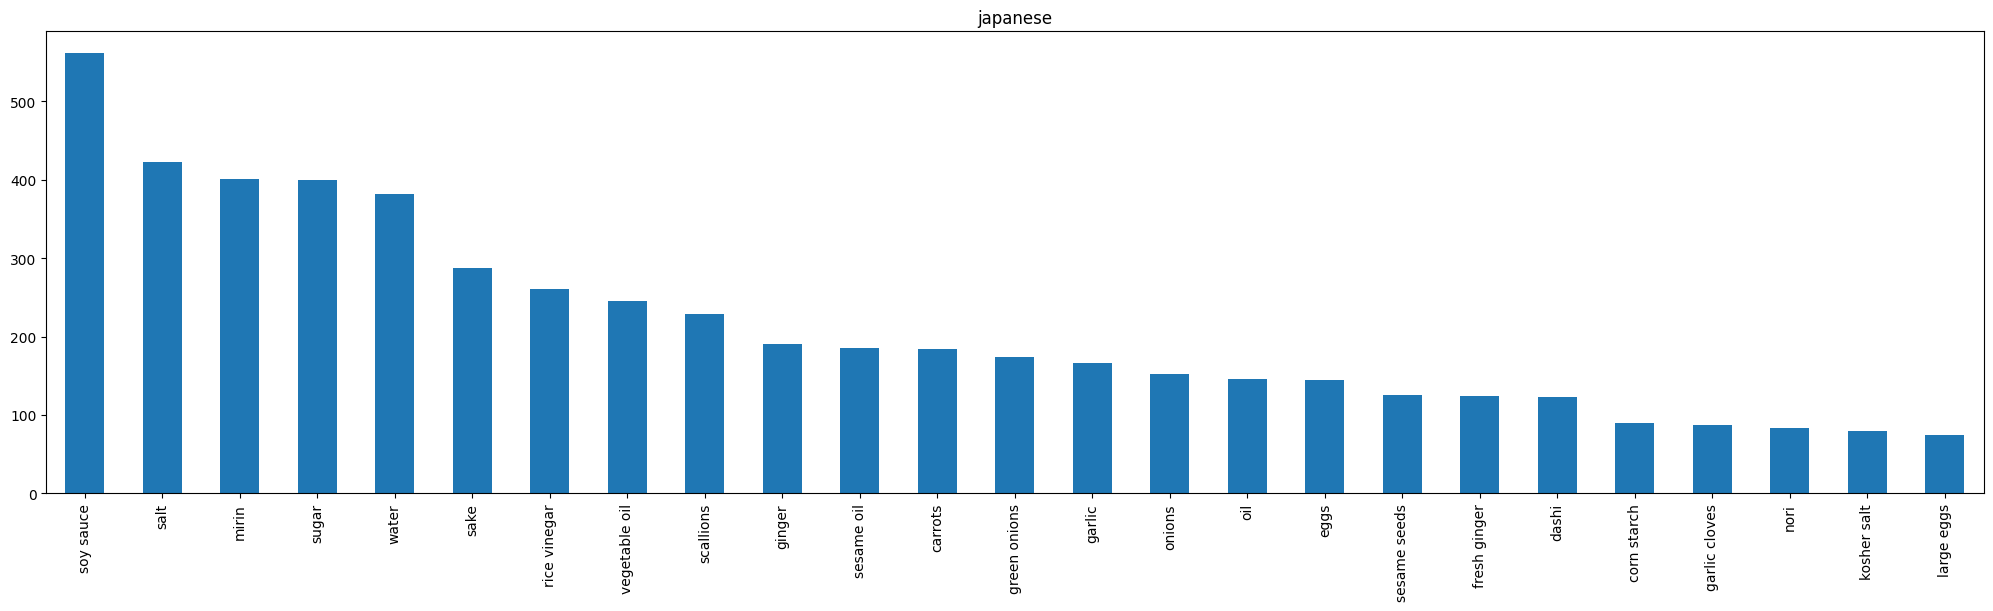

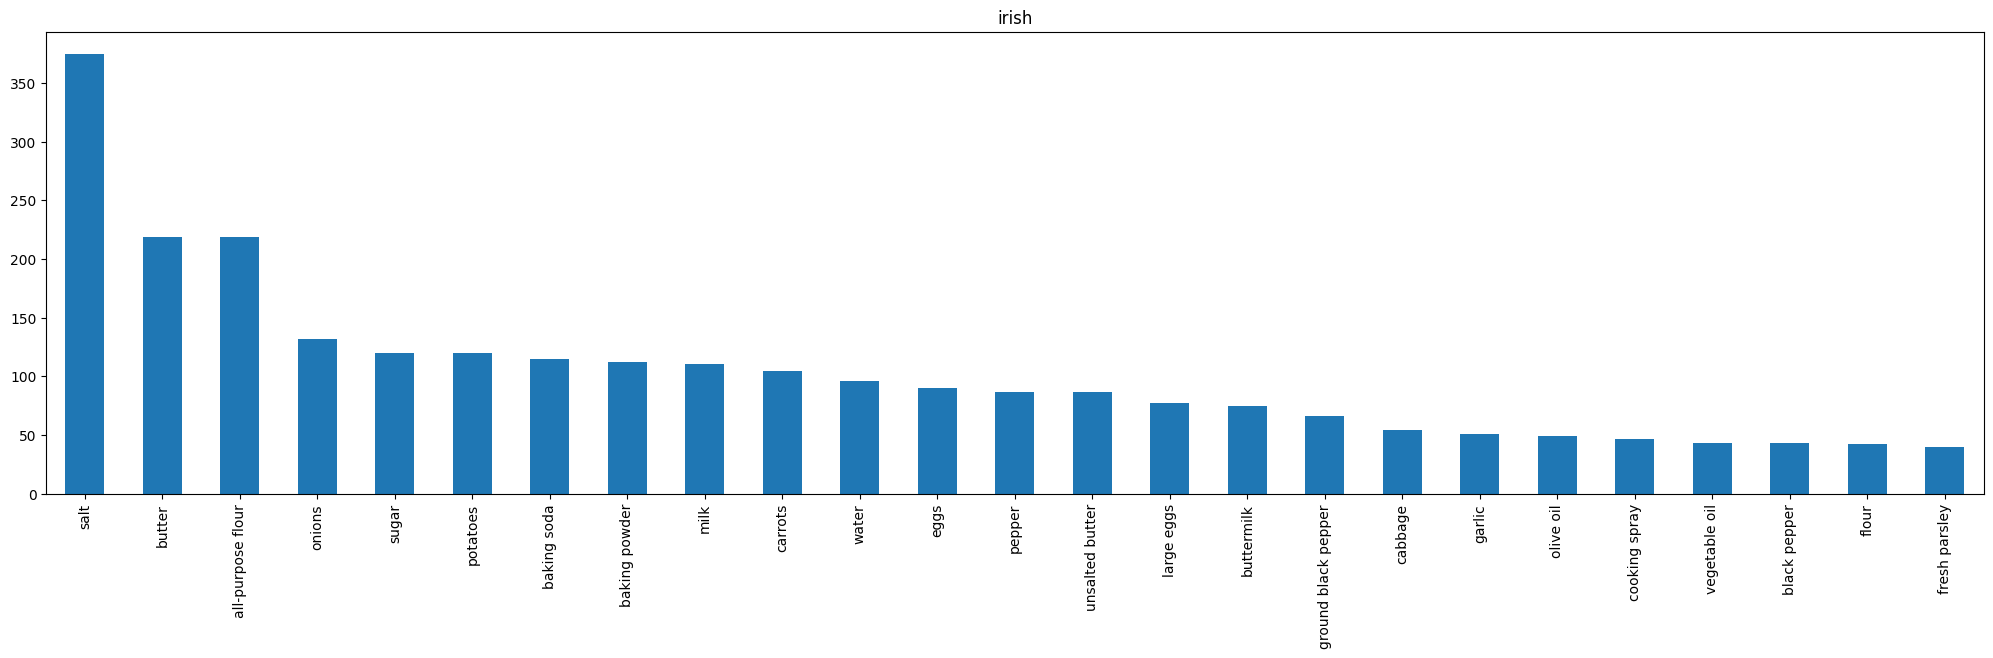

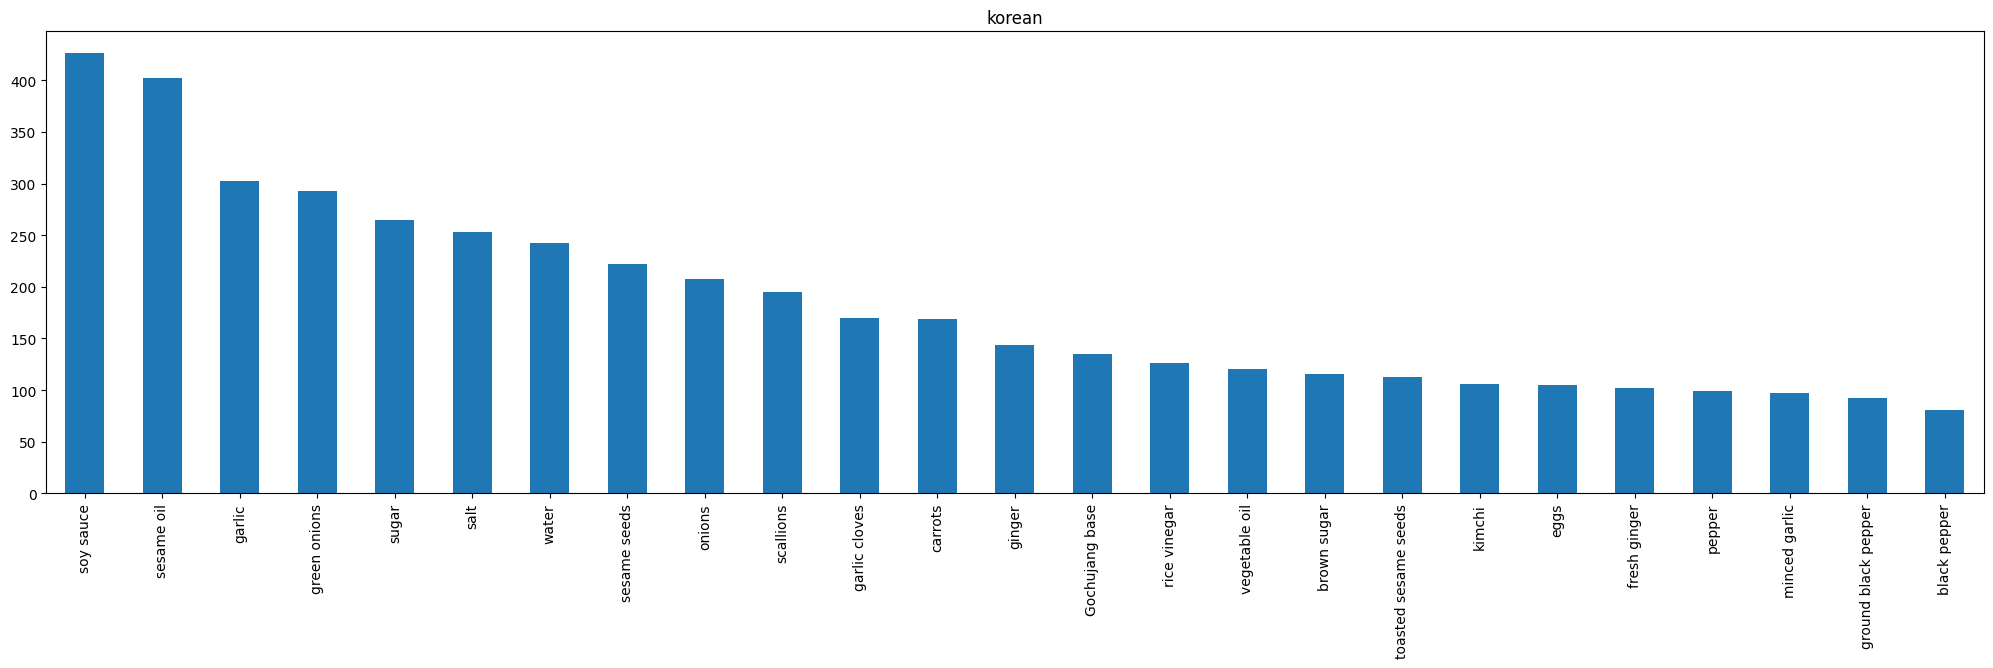

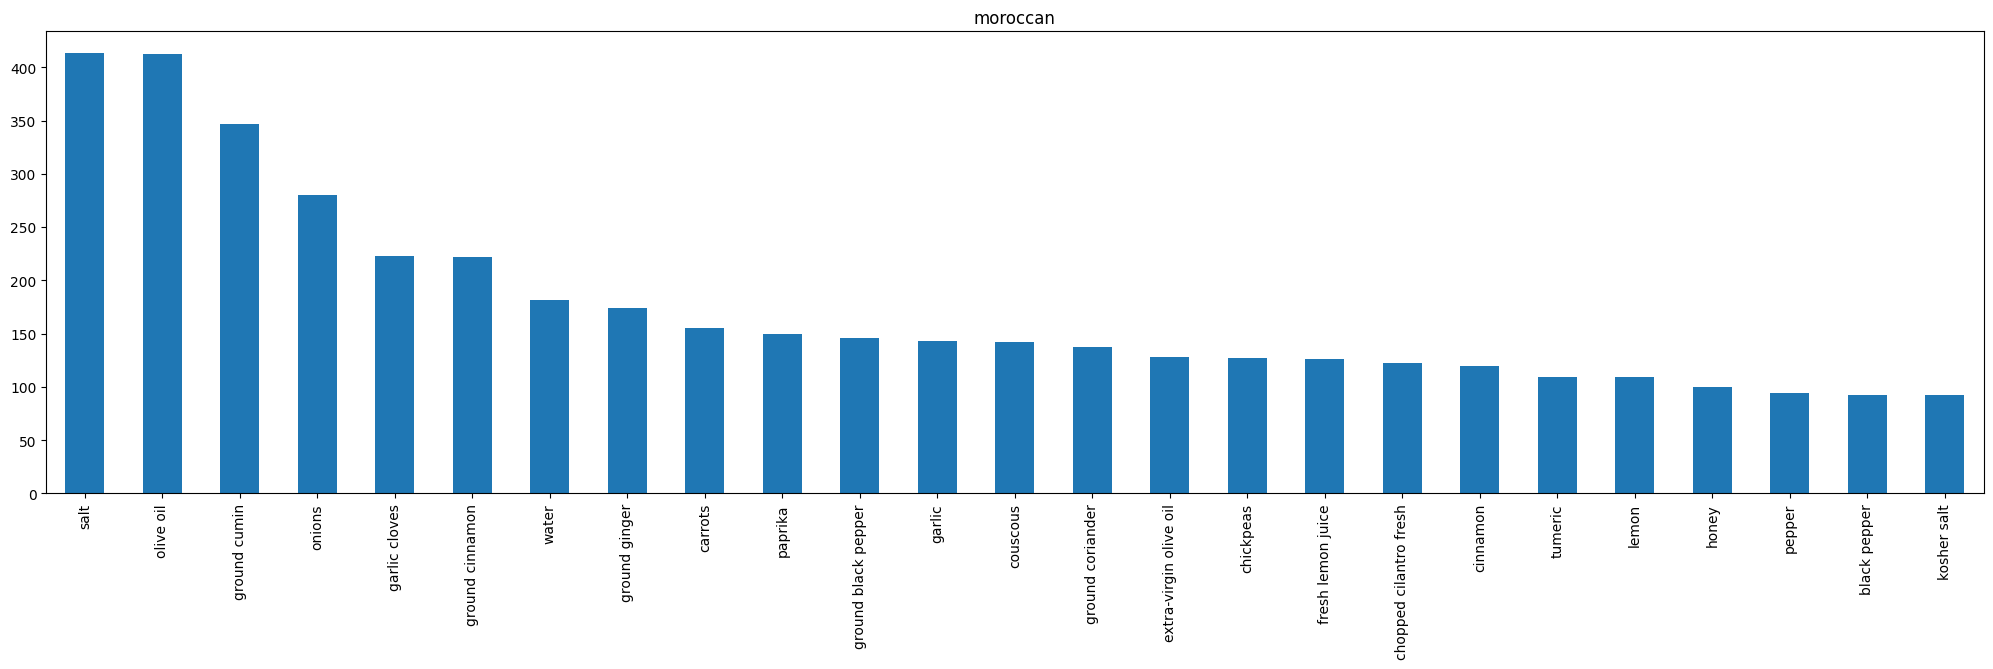

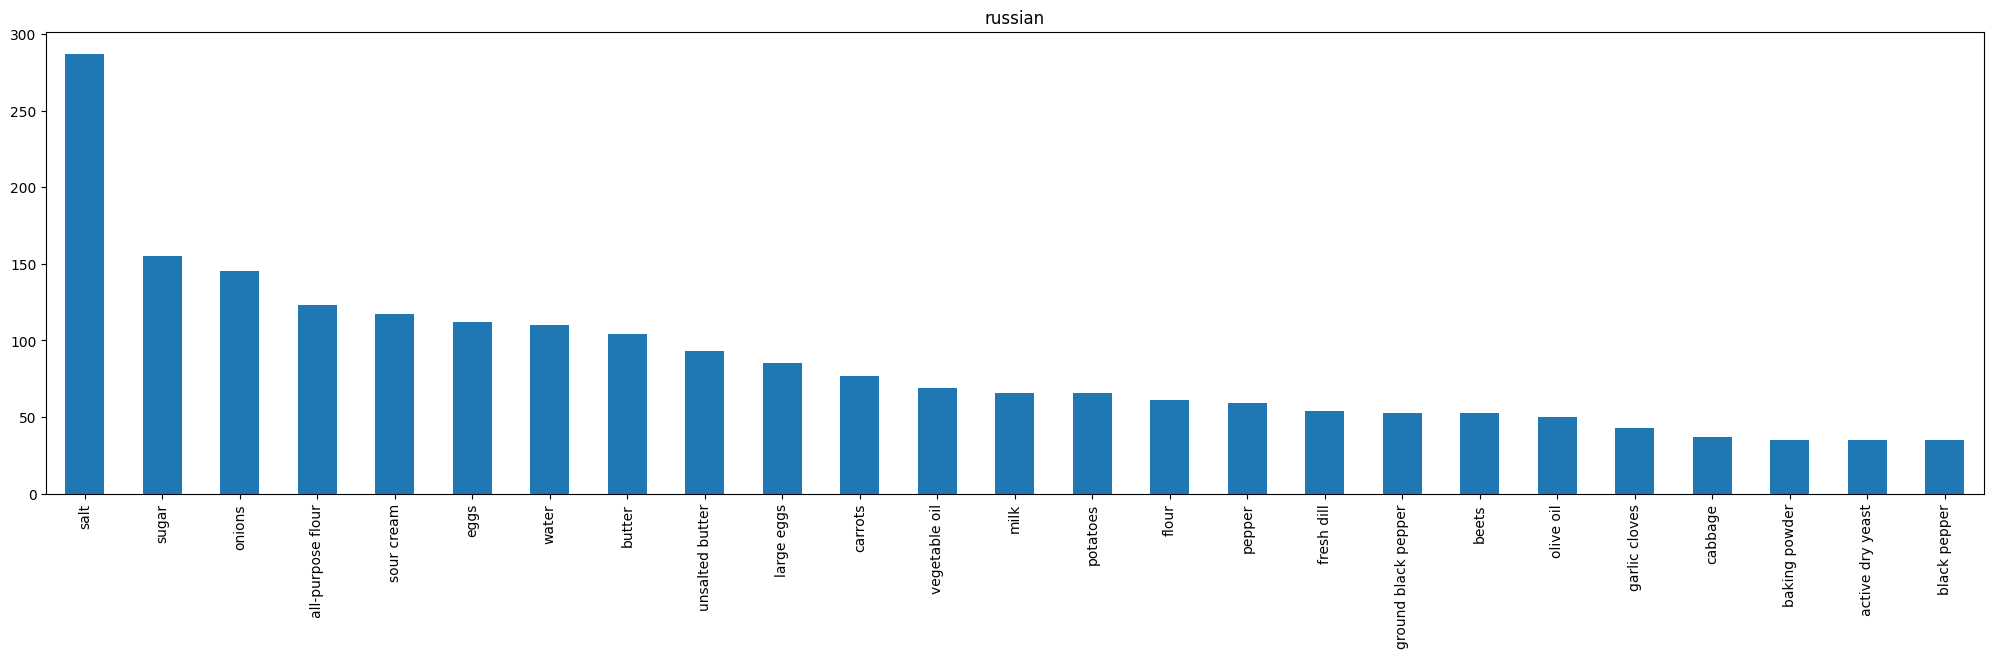

In [ ]:
def visualize_cuisine_ingredient(diction, keys, size):
  for key in keys:
    fig, ax = plt.subplots(figsize=(25,6))
    pd.Series(diction[key]).value_counts().head(25).plot.bar(ax=ax, title=key)
    plt.show()

diction = get_cuisines_ingredients()
keys = diction.keys()
visualize_cuisine_ingredient(diction, keys, 5)

In [ ]:
one_ingredients = df[df['ingredients'].apply(lambda x: len(x) <= 1)]
one_ingredients

,id,cuisine,ingredients
940,4734,japanese,[sushi rice]
2088,7833,vietnamese,[dried rice noodles]
6787,36818,indian,[plain low-fat yogurt]
7011,19772,indian,[unsalted butter]
8181,16116,japanese,[udon]
8852,29738,thai,[sticky rice]
8990,41124,indian,[butter]
10506,32631,mexican,[corn tortillas]
13178,29570,thai,[grained]
17804,29849,southern_us,[lemonade concentrate]


# Transformationing/Normalizing Ingredient Lists

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
from nltk.util import ngrams

def preprocess_ingredient_list(ingredient_list):

    # Join the list of ingredients into a string
    ingredient_str = ' '.join(ingredient_list)

    # Lowercasing
    ingredient_str = ingredient_str.lower()

    # Correcting any spelling errors (not time efficient)
    # TextBlob(ingredient_str).correct()

    # Removing accents
    ingredient_str = unidecode(ingredient_str)

    # Removing any non-alphabetical characters
    ingredient_str = re.sub(r'[^a-z\s]', '', ingredient_str)

    # Removing common units
    ingredient_str = re.sub((r'\b(oz|ounce|pound|lb|inch|inches|kg)\b'), ' ', ingredient_str)

    # Lemmatization with NLTK
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(ingredient_str)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Bigrams (reduces accuracy)
    # Generate bigrams
    # bigrams = list(ngrams(tokens, 2))

    # Convert bigrams to string format
    # bigram_strings = ['_'.join(bigram) for bigram in bigrams]

    # Combine preprocessed tokens and bigram strings
    # preprocessed_tokens = tokens + bigram_strings

    ingredient_str = ' '.join(tokens)

    return ingredient_str

In [ ]:
# Apply preprocessing to ingredients column
df['filtered_ingredients'] = df['ingredients'].apply(preprocess_ingredient_list)

In [ ]:
# Checking if our function works
for ingredient, expected in [
    ('Eggs', 'egg'),
    ('all-purpose flour', 'allpurpose flour'),
    ('purée', 'puree'),
    ('1% low-fat milk', 'lowfat milk'),
    ('half & half', 'half half'),
    ('safetida (powder)', 'safetida powder'),
    ('Hidden Valley® Greek Yogurt Original Ranch® Dip Mix', 'hidden valleyr greek yogurt original ranchr dip mix'),
    ("Bell peppers", "bell pepper"),
    ("Red peppers", "red pepper"),
]:
  actual = preprocess_ingredient_list([ingredient])
  assert actual == expected, f'"{expected}" is excpected but got "{actual}"'

In [ ]:
df.head()

,id,cuisine,ingredients,filtered_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olive grape tomato garli...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomato ground b...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",egg pepper salt mayonaise cooking oil green ch...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallot cornflour cayenne pepper ...


# Vectorizing and Encoding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=list(stop_words))
X = vectorizer.fit_transform(df["filtered_ingredients"].values)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['cuisine'].values)

# Train Model(s)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

# Create a dummy classifier using the 'most_frequent' strategy
dummy_classifier = DummyClassifier(strategy='most_frequent')

# Perform cross-validation
scores = cross_val_score(dummy_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.19710874 0.19698303 0.19698303 0.19710874 0.19713352]
Mean Accuracy: 0.19706341001930178


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X, y)

# Perform cross-validation
cv_scores = cross_val_score(nb_classifier, X, y, cv=5)

# Print the accuracy scores for each fold
print("Cross-validation scores:", cv_scores)

# Calculate the mean accuracy across all folds
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [0.67052168 0.67894406 0.66159648 0.67039598 0.67198894]
Mean accuracy: 0.6706894277545288


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
scores = cross_val_score(rf_classifier, X, y, cv=5)

# Train the classifier on the entire dataset
rf_classifier.fit(X, y)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.75185418 0.75813953 0.74883721 0.74418605 0.7552175 ]
Mean Accuracy: 0.7516468942174891


In [ ]:
import xgboost as xgb

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the entire dataset
xgb_classifier.fit(X, y)

# Perform cross-validation
scores = cross_val_score(xgb_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

KeyboardInterrupt: ignored

Mean accuracy for XGBoost is typically around 0.78.

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X, y)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X, y, cv=5)

# Print the accuracy scores for each fold
print("Cross-validation scores:", cv_scores)

# Calculate the mean accuracy across all folds
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [0.79912005 0.80678818 0.79849151 0.79660591 0.80575811]
Mean accuracy: 0.8013527531894187


Mean accuracy for SVC is typically around 0.809.
We select SVC as our model.

# Improving Our Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X,y)

# Get the best hyperparameters and the corresponding SVM model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Grid Search finds that C=10, gamma=1 and kernel='rbf' are the best hyperparameters.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# Create an SVM classifier with best hyperparameters
svm_classifier = SVC(C=10, gamma=1, kernel='rbf')

# Train the classifier
svm_classifier.fit(X, y)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X, y, cv=5)

# Print the accuracy scores for each fold
print("Cross-validation scores:", cv_scores)

# Calculate the mean accuracy across all folds
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)

The mean accuracy remains at 0.809.